In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/raw/mushrooms.csv')
y = df['class']
df = df.drop(columns=['class'])
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,s,f,g,t,p,f,d,n,k,e,...,s,c,c,p,w,t,p,k,n,u
1,x,g,y,t,a,d,c,b,k,e,...,y,e,e,p,w,o,p,u,a,p
2,k,s,n,t,l,f,w,b,n,t,...,k,b,b,p,w,o,p,n,v,g
3,b,y,w,t,y,f,c,n,e,t,...,k,w,g,p,w,b,n,k,s,u
4,b,s,g,f,n,n,c,b,o,t,...,s,w,e,p,w,b,z,w,a,g


In [4]:
dum = pd.get_dummies(df)
dum.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
pca = PCA(n_components=.95)
trans = pca.fit_transform(dum)

## Visualisation

### Variance explained

Text(0.5, 1.0, 'PCA variance explained')

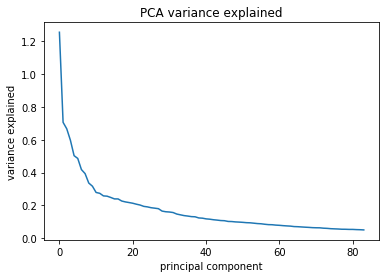

In [39]:
plt.plot(pca.explained_variance_)
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.title('PCA variance explained')

### First two PCs

In [41]:
headers = ['feat_{}'.format(i) for i in range(trans.shape[1])]
df_out = pd.DataFrame(data=trans, columns=headers)
pcad_df = df_out.join(y.replace('e', 0).replace('p', 1))

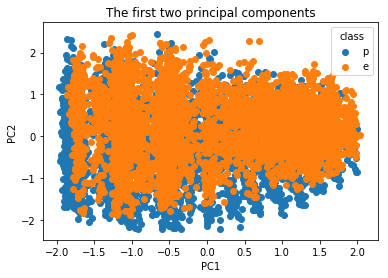

In [49]:
poisonous = pcad_df[pcad_df['class'] == 1]
edible = pcad_df[pcad_df['class'] == 0]
plt.scatter(poisonous['feat_0'], poisonous['feat_1'], label='p')
plt.scatter(edible['feat_0'], edible['feat_1'], label='e')
plt.legend(title='class')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('The first two principal components')
plt.show()

## Scribblin

(array([1514., 1291., 1081.,  955.,  131.,  562.,  895.,  549.,  837.,
         309.]),
 array([-1.91984178e+00, -1.44052092e+00, -9.61200050e-01, -4.81879185e-01,
        -2.55831858e-03,  4.76762547e-01,  9.56083413e-01,  1.43540428e+00,
         1.91472515e+00,  2.39404601e+00,  2.87336688e+00]),
 <a list of 10 Patch objects>)

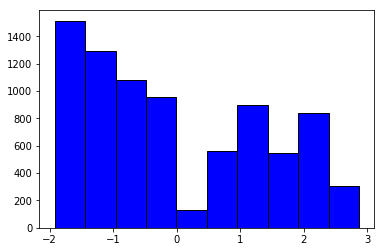

In [47]:
plt.hist(trans[:,0], color = 'blue', edgecolor = 'black')

In [58]:
trans

array([[-0.99624519],
       [-1.44173282],
       [-1.52408477],
       ...,
       [-0.28781672],
       [ 1.93043302],
       [-0.24929719]])

In [68]:
trans_with_y = pd.concat([y,pd.Series(trans[:,0])], axis=1)

In [70]:
e = trans_with_y[trans_with_y['class'] == 'e']
p = trans_with_y[trans_with_y['class'] == 'p']

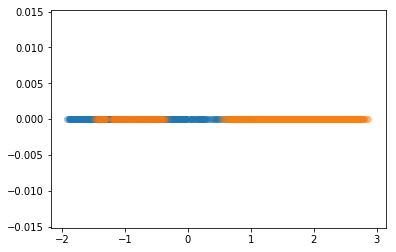

In [78]:
plt.scatter(x=e[0],y=np.zeros(len(e)), alpha=0.1)
plt.scatter(x=p[0],y=np.zeros(len(p)), alpha=0.1)

In [24]:
df2 = pd.read_csv('../data/processed/mushrooms_pca.csv')
df2.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,class
0,0.243738,0.169633,0.187271,1.376409,-0.106942,-0.878097,-0.210952,-0.687473,-1.018611,-0.662291,...,0.042792,-0.063609,-0.120454,0.507655,0.023254,0.222428,-0.262144,-0.048115,0.100873,1
1,1.571371,-0.396568,0.453902,-0.311216,-1.197749,0.324961,-0.004409,-0.342539,-0.375380,0.408702,...,-0.049725,0.265986,-0.026997,0.042791,-0.083705,-0.486171,-0.114538,0.410431,-0.284866,0
2,0.011710,0.712847,-0.750129,-0.960438,-0.482845,-1.151565,0.035126,0.225844,0.366011,0.077844,...,-0.188762,0.210489,0.006704,0.176389,0.223179,0.171282,0.003131,-0.259227,-0.067332,0
3,-0.582489,-0.780651,1.257254,-0.378224,0.070664,-0.385106,0.960738,-1.132339,-0.243777,-0.334009,...,-0.489868,0.084006,0.331273,-0.240141,0.242239,0.228877,-0.268884,-0.078804,-0.339742,1
4,-0.534264,0.601503,1.705691,-0.109213,0.405468,0.472674,-0.394598,-0.405106,0.541237,1.374447,...,-0.014964,0.052490,0.104576,0.261490,0.152714,0.093212,0.101715,0.029535,-0.002264,0


In [30]:
from sklearn.datasets import load_digits
load_digits()['data'].shape

(1797, 64)